
# 📚 Multiple Linear Regression from Scratch

---

##  1. Linear Regression Model

We assume:

$$
y = X\beta + \varepsilon
$$

Where:
* $y: n \times 1$ vector of outputs
* $X : n \times p $ design matrix (with intercept column)
* $\beta:  p \times 1 $ vector of coefficients
* $\varepsilon$ : error term

---

##  2. Sum of Squared Errors (SSE)

The objective is to minimize:

$$
\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

With predictions:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}
$$

In **matrix form**:

$$
\text{SSE} = \| y - X\beta \|^2 = (y - X\beta)^\top (y - X\beta)
$$

---

##  3. Differentiate and Set to Zero

Expand:

$$
J(\beta) = (y - X\beta)^\top (y - X\beta)
$$

Derivative:

$$
\frac{\partial J}{\partial \beta} = -2X^\top(y - X\beta)
$$

Set derivative to zero:

$$
-2X^\top(y - X\beta) = 0 \implies X^\top y - X^\top X \beta = 0
$$

---

## 4. Solve for \(\beta\)

$$
X^\top X \beta = X^\top y
$$

So the **Normal Equation** is:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

---

## 5. Why Intercept is Included?

We add a column of ones to \(X\):

$$
X =
\begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1p} \\
1 & x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}
$$

Then:

$$
\beta =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p
\end{bmatrix}
$$

So the intercept is part of the matrix multiplication.

---

## 6. Gradient Descent (Alternative)

Cost function:

$$
J(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - X_i \beta)^2
$$

Gradient:

$$
\frac{\partial J}{\partial \beta} = -\frac{2}{n} X^\top (y - X\beta)
$$

Update rule:

$$
\beta^{(t+1)} = \beta^{(t)} - \alpha \cdot \frac{\partial J}{\partial \beta}
$$

Where:
- \(\alpha\) = learning rate
- Repeat until convergence

The dataset is 50Startups.csv from Link "https://gist.github.com/kitmonisit/900affc23e780ac853c439b30fce5cd0.js"


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

### Loading the Dataset

In [ ]:
# 1. Load the dataset
file_path = "50_Startups.csv"
data = pd.read_csv(file_path)

In [ ]:
print(data)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

### Handle Categorical Values

In [ ]:
# 2. Preprocess: One-hot encode 'State'
data = pd.get_dummies(data, columns=['State'], drop_first=True)

In [ ]:
print(data)

    R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0   165349.20       136897.80        471784.10  192261.83          False   
1   162597.70       151377.59        443898.53  191792.06          False   
2   153441.51       101145.55        407934.54  191050.39           True   
3   144372.41       118671.85        383199.62  182901.99          False   
4   142107.34        91391.77        366168.42  166187.94           True   
5   131876.90        99814.71        362861.36  156991.12          False   
6   134615.46       147198.87        127716.82  156122.51          False   
7   130298.13       145530.06        323876.68  155752.60           True   
8   120542.52       148718.95        311613.29  152211.77          False   
9   123334.88       108679.17        304981.62  149759.96          False   
10  101913.08       110594.11        229160.95  146121.95           True   
11  100671.96        91790.61        249744.55  144259.40          False   
12   93863.7

In [ ]:
# Features and target
X = data.drop('Profit', axis=1).astype(float).values
y = data['Profit'].astype(float).values

In [ ]:
print(X)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00 1.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00 0.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00 1.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 1.0000000e+00 0.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00 1.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 1.0000000e+00 0.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00 1.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 1.0000000e+00 0.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 0.0000000e+00 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 1.0000000e+00 0.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 0.00000

In [ ]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [ ]:
print(X)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00 1.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00 0.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00 1.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 1.0000000e+00 0.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00 1.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 1.0000000e+00 0.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00 1.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 1.0000000e+00 0.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 0.0000000e+00 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 1.0000000e+00 0.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 0.00000

In [ ]:
### Split into train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (40, 5)
X_test shape: (10, 5)


In [ ]:
# Add intercept column

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))
X_test_scaled = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled))


### Normal Equation

In [ ]:
# 3. Normal Equation

XtX = X_train_scaled.T @ X_train_scaled
XtY = X_train_scaled.T @ y_train
beta_normal = np.linalg.inv(XtX) @ XtY


## Predictions and R² for Normal Equation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_normal = X_test_scaled @ beta_normal
r2_normal = r2_score(y_test, y_pred_normal)
mse_normal = mean_squared_error(y_test, y_pred_normal)


### Gradient Descent

In [ ]:
# 4. Gradient Descent
alpha = 0.01  # Learning rate (works after scaling)
iterations = 5000
beta_gd = np.zeros(X_train_scaled.shape[1])
cost_history = []

for i in range(iterations):
    predictions = X_train_scaled @ beta_gd
    errors = y_train - predictions
    gradient = -(2/X_train_scaled.shape[0]) * (X_train_scaled.T @ errors)
    beta_gd -= alpha * gradient
    cost = (errors @ errors) / X_train_scaled.shape[0]
    cost_history.append(cost)


### Compute R

In [ ]:
# Predictions and R² for Gradient Descent
y_pred_gd = X_test_scaled @ beta_gd
r2_gd = r2_score(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)



# Print results
print("Coefficients (Normal Equation):", beta_normal)
print("R² (Normal Equation):", r2_normal, "MSE:", mse_normal)
print("Coefficients (Gradient Descent):", beta_gd)
print("R² (Gradient Descent):", r2_gd, "MSE:", mse_gd)


Coefficients (Normal Equation): [ 1.15651721e+05  3.81022693e+04 -1.86475430e+03  3.38617581e+03
  4.47775725e+02  3.27289103e+00]
R² (Normal Equation): 0.8987266414319838 MSE: 82010363.0450136
Coefficients (Gradient Descent): [ 1.15651720e+05  3.81022692e+04 -1.86475429e+03  3.38617584e+03
  4.47775719e+02  3.27288824e+00]
R² (Gradient Descent): 0.8987266414031764 MSE: 82010363.06834161


### Plot Cost vs Iterations

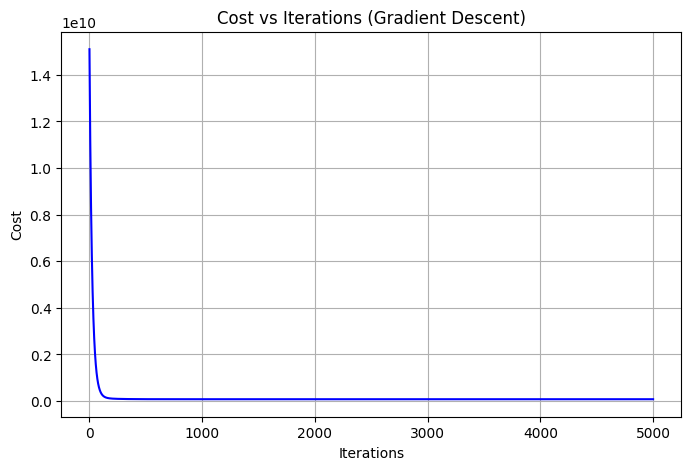

In [ ]:

import matplotlib.pyplot as plt

# Plot cost vs iterations using Matplotlib
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost vs Iterations (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


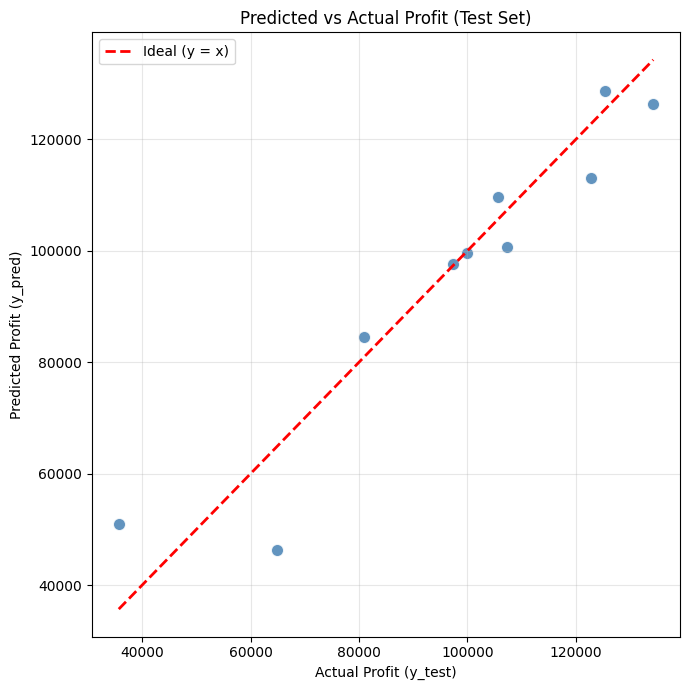

In [ ]:
### Normal Equation
# --- Plot Predicted vs Actual ---
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_normal, color='steelblue', edgecolor='white', s=80, alpha=0.85)
min_val = min(y_test.min(), y_pred_normal.min())
max_val = max(y_test.max(), y_pred_normal.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal (y = x)')
plt.title('Predicted vs Actual Profit (Test Set)')
plt.xlabel('Actual Profit (y_test)')
plt.ylabel('Predicted Profit (y_pred)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pred_vs_actual.png')
plt.show()


In [ ]:
### Plot Predicted vs actual for Gradient Descent

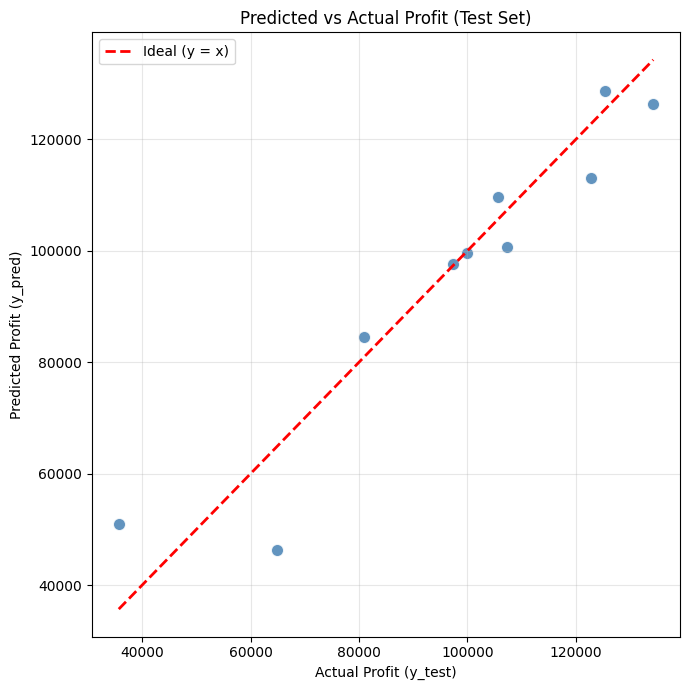

In [ ]:
# --- Plot Predicted vs Actual ---
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_gd, color='steelblue', edgecolor='white', s=80, alpha=0.85)
min_val = min(y_test.min(), y_pred_gd.min())
max_val = max(y_test.max(), y_pred_gd.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal (y = x)')
plt.title('Predicted vs Actual Profit (Test Set)')
plt.xlabel('Actual Profit (y_test)')
plt.ylabel('Predicted Profit (y_pred)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pred_vs_actual.png')
plt.show()


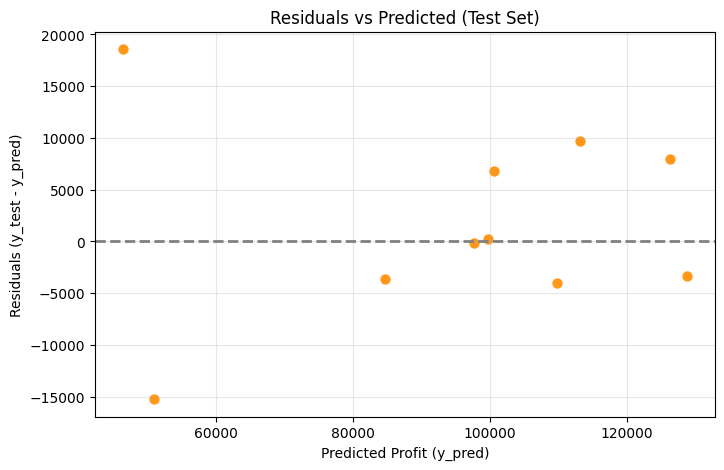

In [ ]:

# --- Plot Residuals vs Predicted ---
residuals = y_test - y_pred_gd
plt.figure(figsize=(8,5))
plt.scatter(y_pred_gd, residuals, color='darkorange', edgecolor='white', s=70, alpha=0.9)
plt.axhline(0, color='gray', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted (Test Set)')
plt.xlabel('Predicted Profit (y_pred)')
plt.ylabel('Residuals (y_test - y_pred)')
plt.grid(True, alpha=0.3)
